In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('cities_predict.csv', index_col=0)
data = data.reset_index()
data.head()

,1br_studio_rent_in_center,adult_nightlife,air_quality_(year-round),airbnb_(monthly),cashless_society,coca-cola,coffee,cost_of_living,cost_of_living_for_expat,cost_of_living_for_local,...,religious_government,safe_tap_water,safety,startup_score,traffic_safety,walkability,nomad_score,region,country,place_slug
0,492.0,4.0,42.0,946.0,1.00000,0.70,1.40,3.0,961.0,626.0,...,0.0,0.0,1.0,3.0,4.0,4.0,4.03,Latin America,Mexico,mexico-city-mexico
1,223.0,3.0,19.0,976.0,1.00000,0.63,1.11,3.0,697.0,349.0,...,0.0,0.0,2.0,3.0,4.0,4.0,4.51,Latin America,Mexico,cancun-mexico
2,503.0,2.0,68.0,1312.0,1.06622,0.54,0.70,3.0,1064.0,631.0,...,1.0,0.0,3.0,2.0,1.0,1.0,4.45,Middle East,Jordan,amman-jordan
3,426.0,2.0,23.0,885.0,2.00000,0.44,1.41,3.0,789.0,522.0,...,0.0,0.0,3.0,3.0,3.0,4.0,4.83,Asia,Vietnam,ho-chi-minh-city-vietnam
4,2740.0,2.0,49.0,2135.0,3.00000,1.06,3.40,1.0,2801.0,2347.0,...,0.0,0.0,3.0,4.0,3.0,4.0,4.11,Asia,China,hong-kong-china


In [3]:
# This data has been scraped from Nomadlist.io and contains data on 730 cities worldwide that digital nomads prefer to
# spend time in.
# The data is a mix between community collected indicators and variables aggregated from public sources.

In [4]:
data.isna().sum()

1br_studio_rent_in_center    0
adult_nightlife              0
air_quality_(year-round)     0
airbnb_(monthly)             0
cashless_society             0
coca-cola                    0
coffee                       0
cost_of_living               0
cost_of_living_for_expat     0
cost_of_living_for_local     0
female_friendly              0
freedom_of_speech            0
friendly_to_foreigners       0
fun                          0
happiness                    0
healthcare                   0
internet                     0
lgbt_friendly                0
nightlife                    0
peace                        0
quality_of_life              0
racial_tolerance             0
religious_government         0
safe_tap_water               0
safety                       0
startup_score                0
traffic_safety               0
walkability                  0
nomad_score                  0
region                       0
country                      0
place_slug                   0
dtype: i

In [5]:
data.dtypes

1br_studio_rent_in_center    float64
adult_nightlife              float64
air_quality_(year-round)     float64
airbnb_(monthly)             float64
cashless_society             float64
coca-cola                    float64
coffee                       float64
cost_of_living               float64
cost_of_living_for_expat     float64
cost_of_living_for_local     float64
female_friendly              float64
freedom_of_speech            float64
friendly_to_foreigners       float64
fun                          float64
happiness                    float64
healthcare                   float64
internet                     float64
lgbt_friendly                float64
nightlife                    float64
peace                        float64
quality_of_life              float64
racial_tolerance             float64
religious_government         float64
safe_tap_water               float64
safety                       float64
startup_score                float64
traffic_safety               float64
w

In [6]:
# 1- get the best cities
best_cities_general = data.sort_values(by='nomad_score', ascending=False)
print(best_cities_general[['place_slug', 'nomad_score']].head(10).to_string(index=False))

                    place_slug  nomad_score
           chiang-mai-thailand         4.97
              budapest-hungary         4.93
              bangkok-thailand         4.90
      ho-chi-minh-city-vietnam         4.83
         canggu-bali-indonesia         4.80
                  kiev-ukraine         4.61
new-york-city-ny-united-states         4.61
  los-angeles-ca-united-states         4.60
               belgrade-serbia         4.59
                  padova-italy         4.57


C:\Users\Usuario\AppData\Local\Temp\ipykernel_6916\1350315405.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


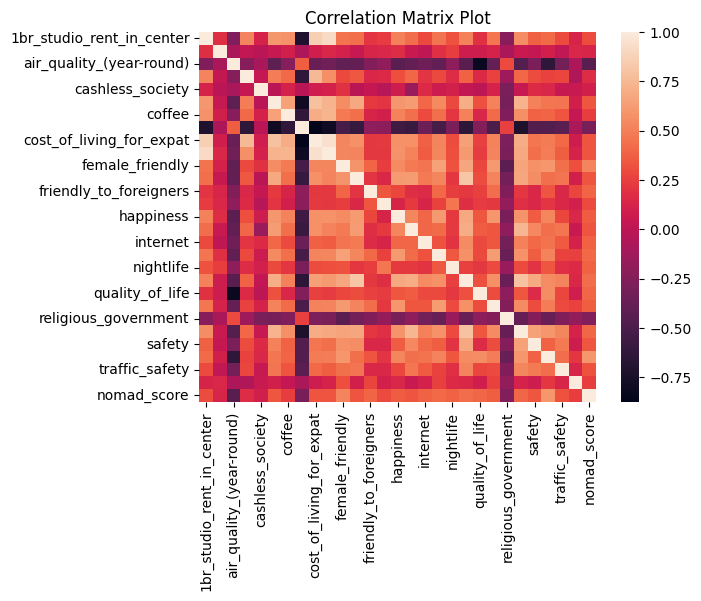

In [7]:
# 2- see what makes a city good for woman (correlation)
corr_matrix = data.corr()
sns.heatmap(corr_matrix)
plt.title('Correlation Matrix Plot')
plt.show()

<Axes: >

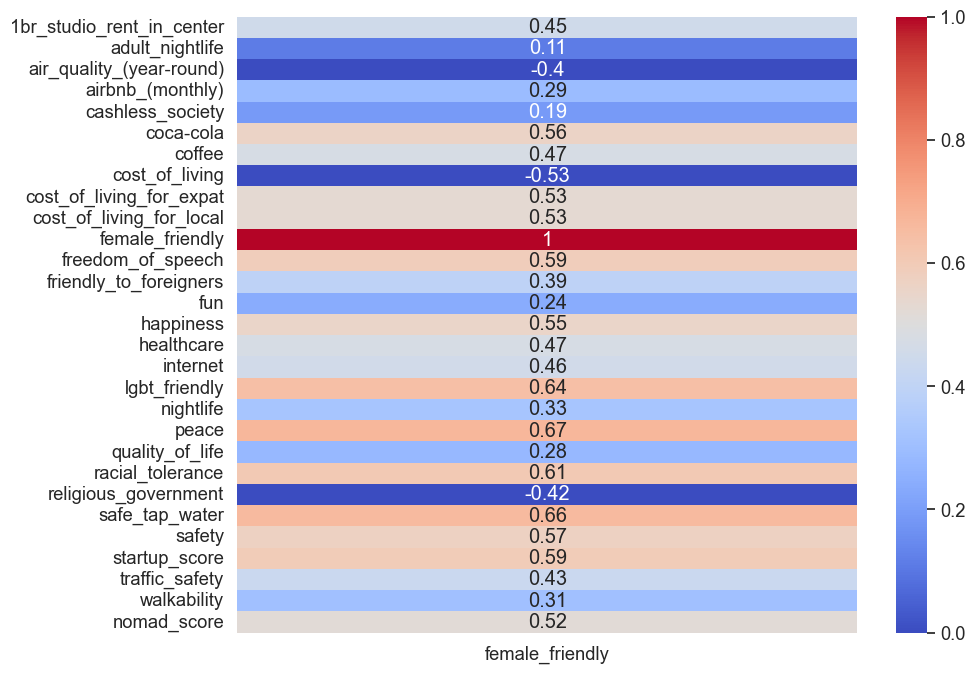

In [8]:
target_feature = 'female_friendly'
corr_target = corr_matrix.loc[:, target_feature]

sns.set(font_scale=1.2)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_target.to_frame(), vmin=0.0, vmax=1.0, cmap='coolwarm', annot=True)
           

In [9]:
# safety, safe tap water, startup score, peace, racial tolerance, lgbt friendly, freedom of speech and coke have correlation with places female friendly

In [10]:
# 3- can we predict if a city is good for woman with the model

In [11]:
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [12]:
categoricalcol = data.select_dtypes(include=['object']).columns
categorical = data[categoricalcol]
categorical.head()

,region,country,place_slug
0,Latin America,Mexico,mexico-city-mexico
1,Latin America,Mexico,cancun-mexico
2,Middle East,Jordan,amman-jordan
3,Asia,Vietnam,ho-chi-minh-city-vietnam
4,Asia,China,hong-kong-china


In [13]:
from sklearn.preprocessing import OneHotEncoder

In [14]:
encoder = OneHotEncoder()
encoded = encoder.fit_transform(categorical)
cat_hot = pd.DataFrame(encoded.toarray(), columns=encoder.get_feature_names_out(input_features=categorical.columns))
cat_hot = cat_hot.reset_index(drop=True)
cat_hot.head()

,region_Africa,region_Asia,region_Europe,region_Latin America,region_Middle East,region_North America,region_Oceania,country_Afghanistan,country_Albania,country_Algeria,...,place_slug_yogyakarta-indonesia,place_slug_yokohama-japan,place_slug_york-united-kingdom,place_slug_zadar-croatia,place_slug_zagreb-croatia,place_slug_zhangjiakou-china,place_slug_zhengzhou-china,place_slug_zhuhai-china,place_slug_zurich-switzerland,place_slug_zwolle-netherlands
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
numerical_cols = data.select_dtypes(include=['int', 'float']).columns
numerical = data[numerical_cols]
numerical.head(20)

,1br_studio_rent_in_center,adult_nightlife,air_quality_(year-round),airbnb_(monthly),cashless_society,coca-cola,coffee,cost_of_living,cost_of_living_for_expat,cost_of_living_for_local,...,peace,quality_of_life,racial_tolerance,religious_government,safe_tap_water,safety,startup_score,traffic_safety,walkability,nomad_score
0,492.000000,4.0,42.0,946.0,1.00000,0.70,1.40,3.0,961.0,626.0,...,2.0,3.0,1.000000,0.0,0.0,1.0,3.0,4.0,4.0,4.03
1,223.000000,3.0,19.0,976.0,1.00000,0.63,1.11,3.0,697.0,349.0,...,2.0,3.0,1.753777,0.0,0.0,2.0,3.0,4.0,4.0,4.51
2,503.000000,2.0,68.0,1312.0,1.06622,0.54,0.70,3.0,1064.0,631.0,...,1.0,3.0,2.043748,1.0,0.0,3.0,2.0,1.0,1.0,4.45
3,426.000000,2.0,23.0,885.0,2.00000,0.44,1.41,3.0,789.0,522.0,...,2.0,3.0,2.000000,0.0,0.0,3.0,3.0,3.0,4.0,4.83
4,2740.000000,2.0,49.0,2135.0,3.00000,1.06,3.40,1.0,2801.0,2347.0,...,2.0,3.0,2.000000,0.0,0.0,3.0,4.0,3.0,4.0,4.11
5,401.000000,2.0,59.0,1586.0,3.00000,0.53,3.90,3.0,1053.0,686.0,...,2.0,3.0,1.000000,0.0,0.0,3.0,3.0,3.0,4.0,3.52
6,418.000000,3.0,24.0,1312.0,3.00000,0.69,2.35,3.0,891.0,591.0,...,1.0,3.0,2.000000,0.0,0.0,3.0,3.0,1.0,2.0,4.54
7,619.000000,4.0,29.0,976.0,1.00000,0.62,2.47,3.0,1067.0,832.0,...,2.0,3.0,2.383253,1.0,0.0,3.0,3.0,1.0,4.0,4.45
8,451.000000,3.0,21.0,1159.0,1.00000,0.67,1.74,3.0,907.0,579.0,...,1.0,3.0,1.781167,1.0,0.0,2.0,2.0,4.0,2.0,3.90
9,198.000000,2.0,57.0,1037.0,1.00000,0.30,0.37,3.0,506.0,228.0,...,1.0,3.0,1.000000,0.0,0.0,2.0,3.0,3.0,4.0,3.25


In [16]:
numerical['cashless_society'] = numerical['cashless_society'].round(1)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6916\1299101291.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical['cashless_society'] = numerical['cashless_society'].round(1)


In [17]:
numerical['racial_tolerance'] = numerical['racial_tolerance'].round(1)


C:\Users\Usuario\AppData\Local\Temp\ipykernel_6916\3652548279.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical['racial_tolerance'] = numerical['racial_tolerance'].round(1)


In [18]:
numerical = numerical.rename(columns={'1br_studio_rent_in_center': 'studio_rent_in_center'})
numerical['studio_rent_in_center'] = numerical['studio_rent_in_center'].round(1)

In [19]:
numerical.head(20)

,studio_rent_in_center,adult_nightlife,air_quality_(year-round),airbnb_(monthly),cashless_society,coca-cola,coffee,cost_of_living,cost_of_living_for_expat,cost_of_living_for_local,...,peace,quality_of_life,racial_tolerance,religious_government,safe_tap_water,safety,startup_score,traffic_safety,walkability,nomad_score
0,492.0,4.0,42.0,946.0,1.0,0.70,1.40,3.0,961.0,626.0,...,2.0,3.0,1.0,0.0,0.0,1.0,3.0,4.0,4.0,4.03
1,223.0,3.0,19.0,976.0,1.0,0.63,1.11,3.0,697.0,349.0,...,2.0,3.0,1.8,0.0,0.0,2.0,3.0,4.0,4.0,4.51
2,503.0,2.0,68.0,1312.0,1.1,0.54,0.70,3.0,1064.0,631.0,...,1.0,3.0,2.0,1.0,0.0,3.0,2.0,1.0,1.0,4.45
3,426.0,2.0,23.0,885.0,2.0,0.44,1.41,3.0,789.0,522.0,...,2.0,3.0,2.0,0.0,0.0,3.0,3.0,3.0,4.0,4.83
4,2740.0,2.0,49.0,2135.0,3.0,1.06,3.40,1.0,2801.0,2347.0,...,2.0,3.0,2.0,0.0,0.0,3.0,4.0,3.0,4.0,4.11
5,401.0,2.0,59.0,1586.0,3.0,0.53,3.90,3.0,1053.0,686.0,...,2.0,3.0,1.0,0.0,0.0,3.0,3.0,3.0,4.0,3.52
6,418.0,3.0,24.0,1312.0,3.0,0.69,2.35,3.0,891.0,591.0,...,1.0,3.0,2.0,0.0,0.0,3.0,3.0,1.0,2.0,4.54
7,619.0,4.0,29.0,976.0,1.0,0.62,2.47,3.0,1067.0,832.0,...,2.0,3.0,2.4,1.0,0.0,3.0,3.0,1.0,4.0,4.45
8,451.0,3.0,21.0,1159.0,1.0,0.67,1.74,3.0,907.0,579.0,...,1.0,3.0,1.8,1.0,0.0,2.0,2.0,4.0,2.0,3.90
9,198.0,2.0,57.0,1037.0,1.0,0.30,0.37,3.0,506.0,228.0,...,1.0,3.0,1.0,0.0,0.0,2.0,3.0,3.0,4.0,3.25


C:\Users\Usuario\AppData\Local\Temp\ipykernel_6916\3330605227.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[col], kde=True, hist=False)


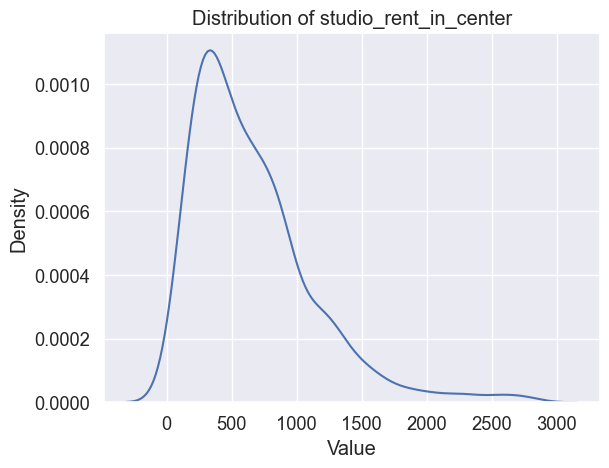

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6916\3330605227.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[col], kde=True, hist=False)


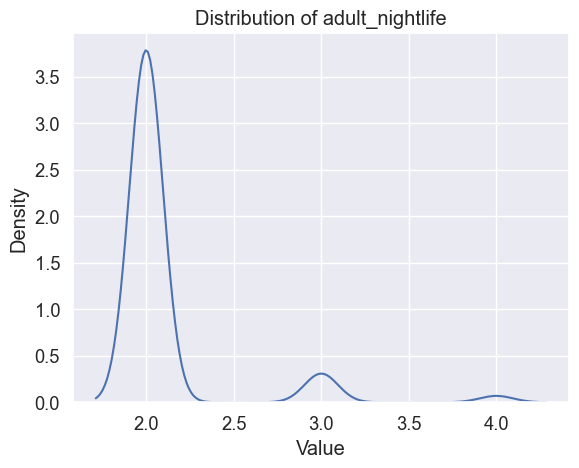

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6916\3330605227.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[col], kde=True, hist=False)


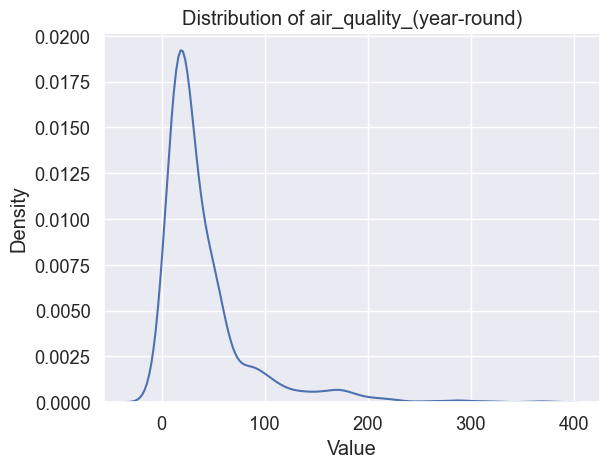

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6916\3330605227.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[col], kde=True, hist=False)


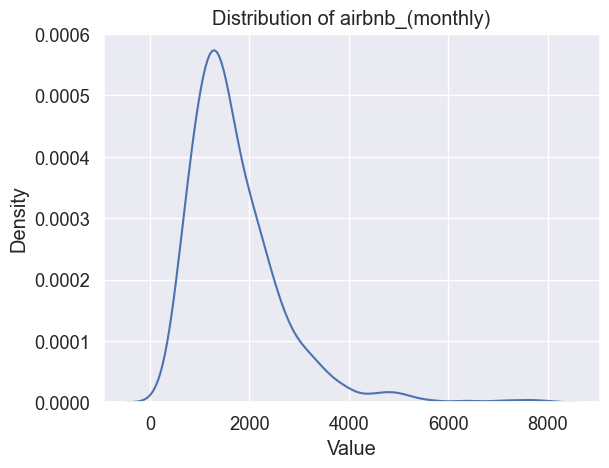

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6916\3330605227.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[col], kde=True, hist=False)


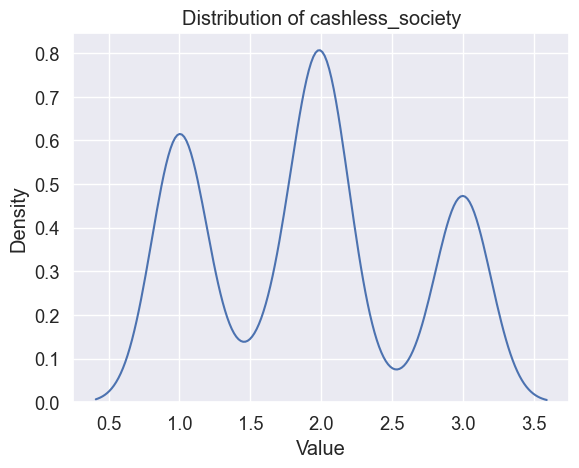

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6916\3330605227.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[col], kde=True, hist=False)


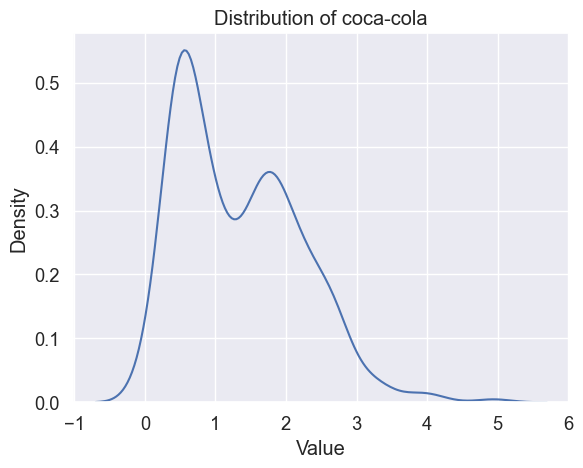

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6916\3330605227.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[col], kde=True, hist=False)


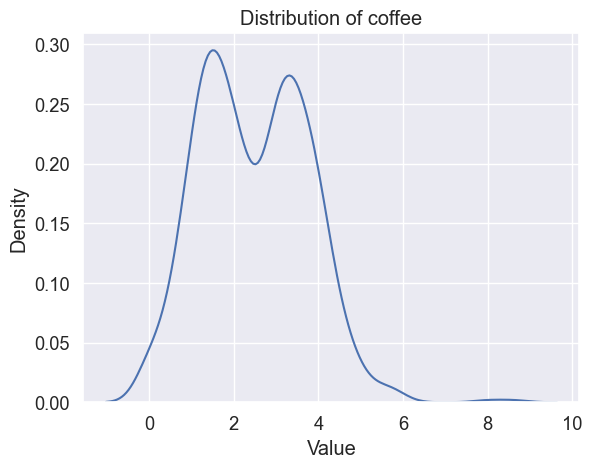

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6916\3330605227.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[col], kde=True, hist=False)


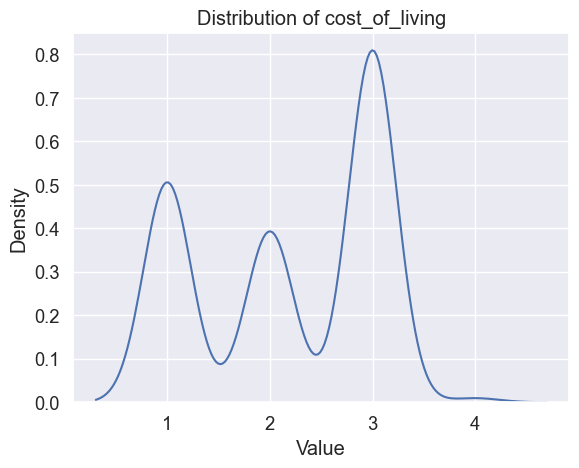

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6916\3330605227.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[col], kde=True, hist=False)


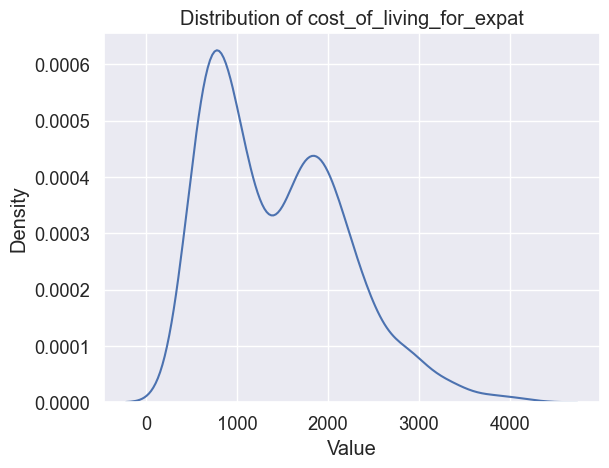

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6916\3330605227.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[col], kde=True, hist=False)


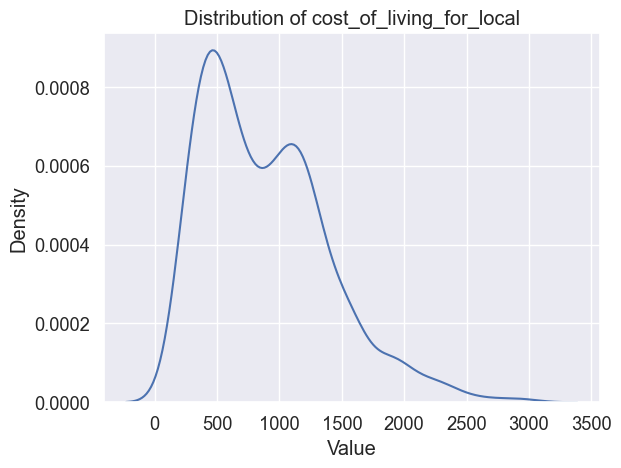

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6916\3330605227.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[col], kde=True, hist=False)


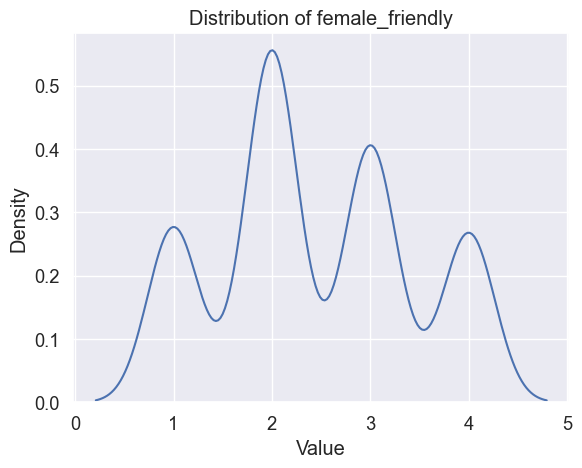

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6916\3330605227.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[col], kde=True, hist=False)


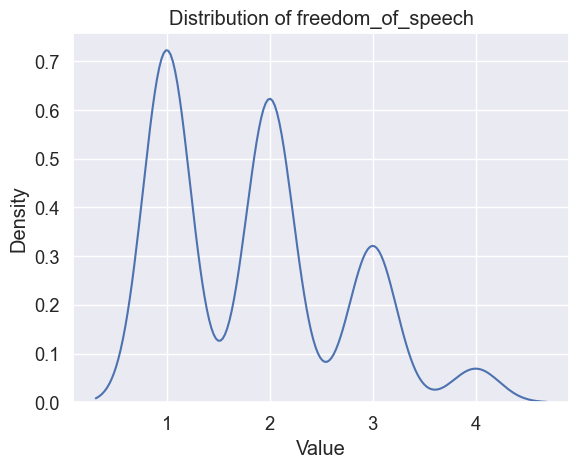

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6916\3330605227.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[col], kde=True, hist=False)


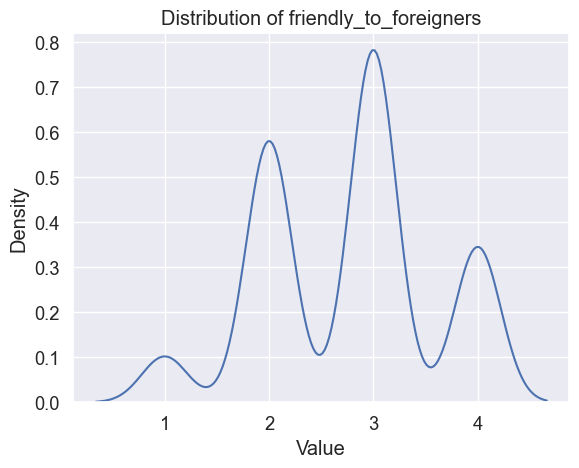

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6916\3330605227.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[col], kde=True, hist=False)


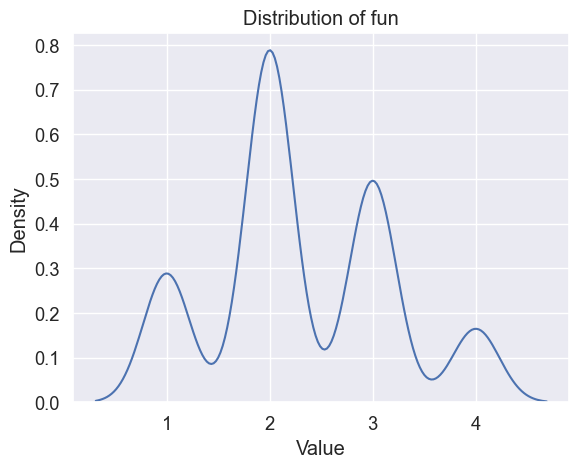

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6916\3330605227.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[col], kde=True, hist=False)


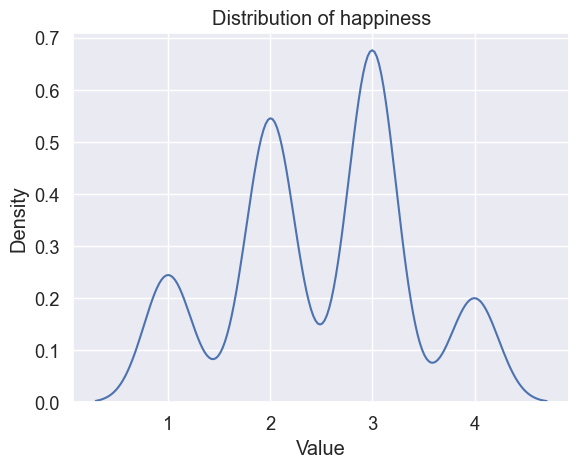

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6916\3330605227.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[col], kde=True, hist=False)


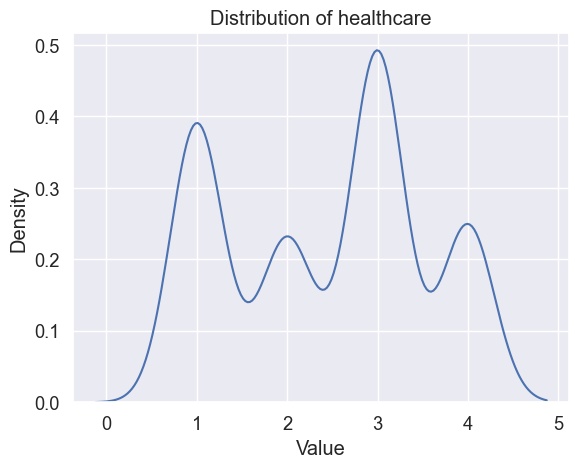

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6916\3330605227.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[col], kde=True, hist=False)


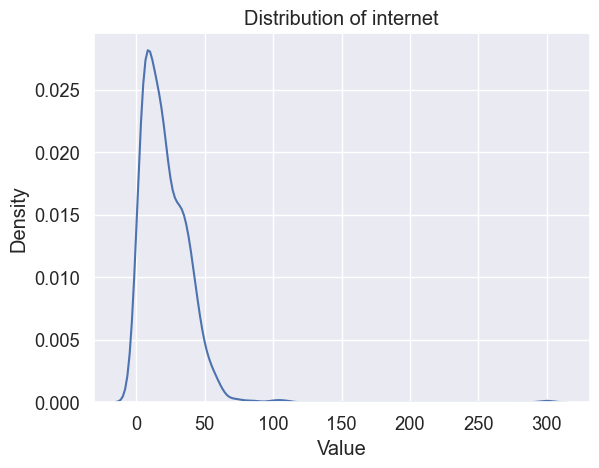

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6916\3330605227.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[col], kde=True, hist=False)


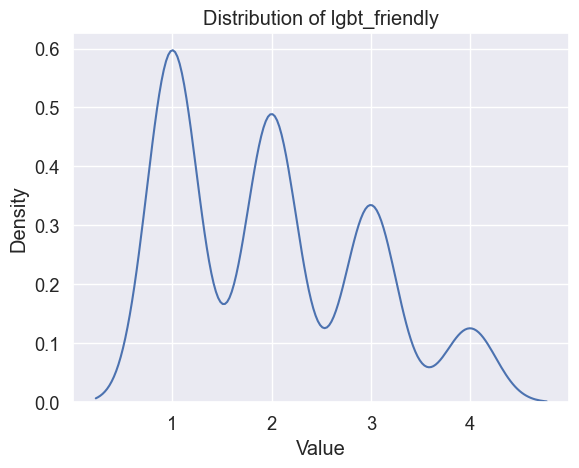

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6916\3330605227.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[col], kde=True, hist=False)


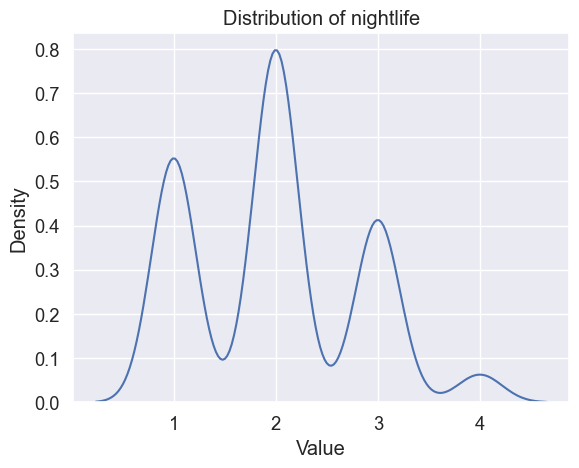

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6916\3330605227.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[col], kde=True, hist=False)


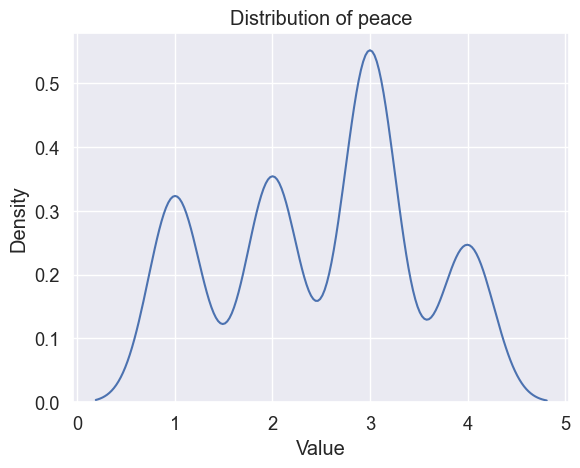

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6916\3330605227.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[col], kde=True, hist=False)


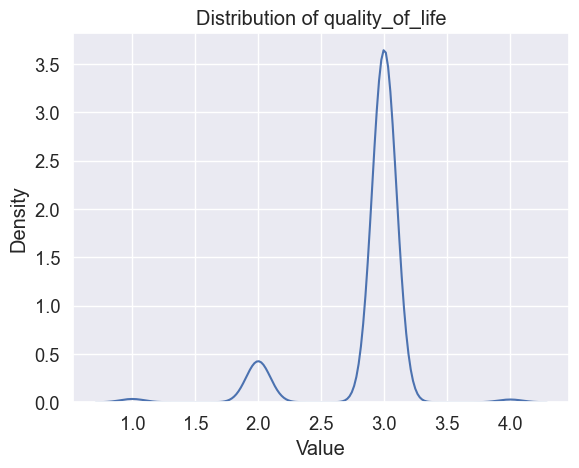

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6916\3330605227.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[col], kde=True, hist=False)


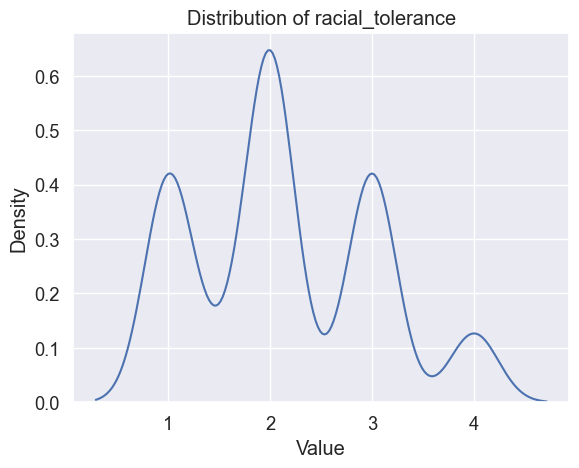

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6916\3330605227.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[col], kde=True, hist=False)


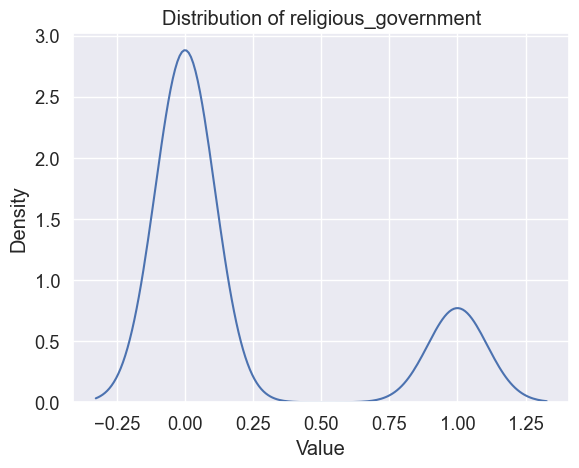

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6916\3330605227.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[col], kde=True, hist=False)


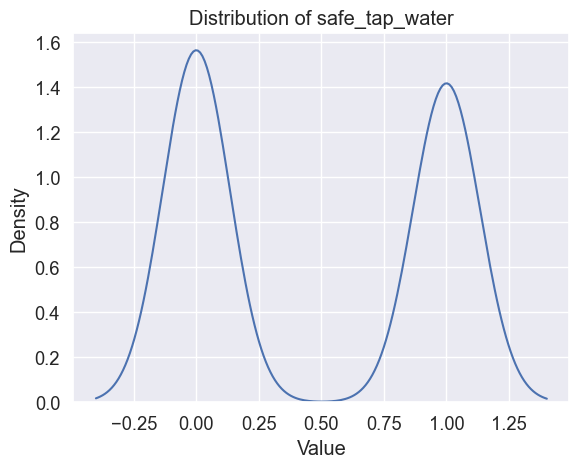

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6916\3330605227.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[col], kde=True, hist=False)


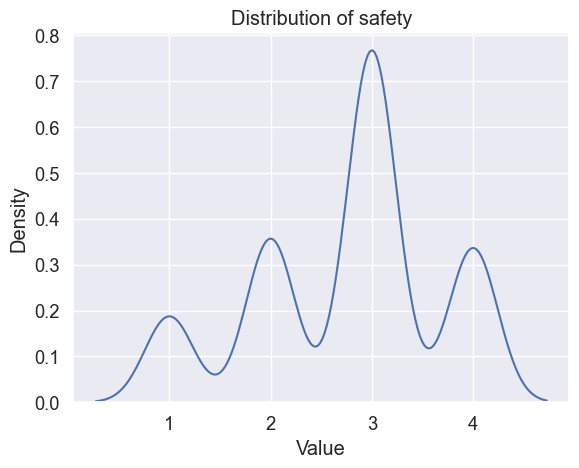

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6916\3330605227.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[col], kde=True, hist=False)


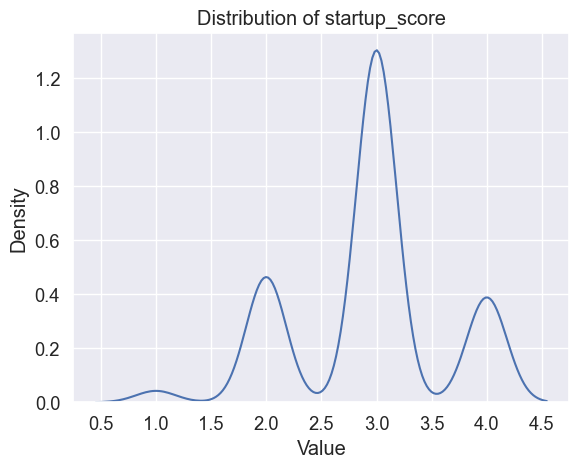

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6916\3330605227.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[col], kde=True, hist=False)


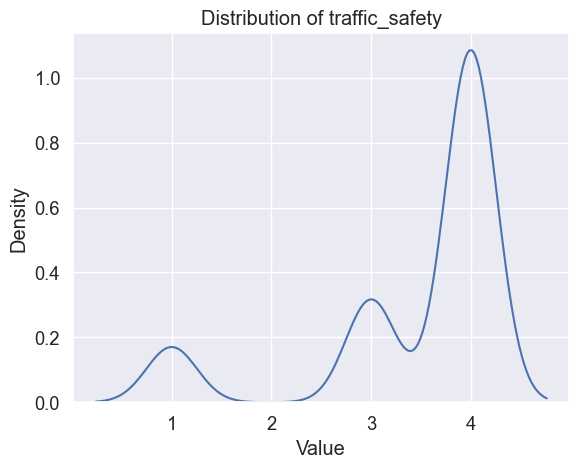

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6916\3330605227.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[col], kde=True, hist=False)


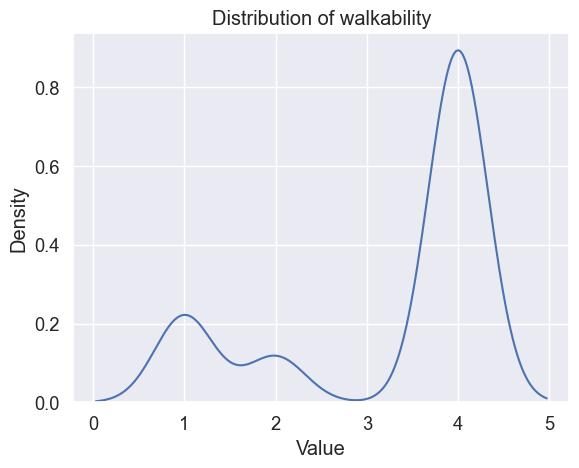

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6916\3330605227.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[col], kde=True, hist=False)


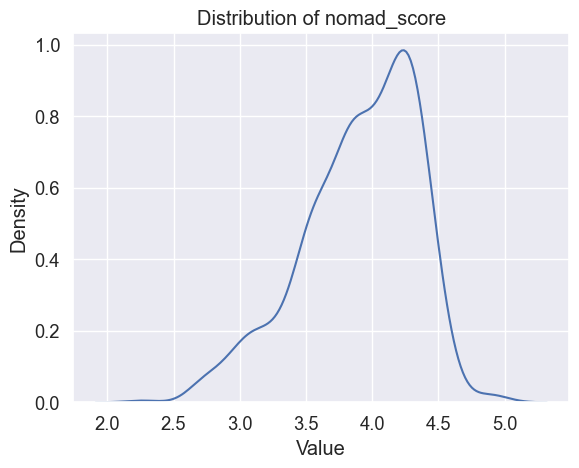

In [20]:
for col in numerical:
    sns.distplot(numerical[col], kde=True, hist=False)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.show()

In [21]:
model_data = pd.concat([numerical.reset_index(drop=True), cat_hot.reset_index(drop=True)], axis=1)

print(model_data.isnull().sum())

studio_rent_in_center            0
adult_nightlife                  0
air_quality_(year-round)         0
airbnb_(monthly)                 0
cashless_society                 0
                                ..
place_slug_zhangjiakou-china     0
place_slug_zhengzhou-china       0
place_slug_zhuhai-china          0
place_slug_zurich-switzerland    0
place_slug_zwolle-netherlands    0
Length: 918, dtype: int64


In [22]:
X = model_data.drop('female_friendly', axis=1)
y = model_data['female_friendly']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 100)

In [23]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
r2_score(y_test, predictions)

0.6519471556660879

In [24]:
from sklearn.metrics import mean_squared_error
import math
mse = mean_squared_error(y_test,predictions)
rmse = math.sqrt(mse)
print('Mean squared error =',mse)
print('Root mean squared error =',rmse)

Mean squared error = 0.3489815877906882
Root mean squared error = 0.5907466358691247


In [25]:
test_data = model_data.drop('female_friendly', axis=1)
predictions = model.predict(test_data)



In [26]:
model_data = model_data.reset_index(drop=True)
model_data['predictions'] = predictions

In [27]:
print(model_data.shape)
print(predictions.shape)

(730, 919)
(730,)


In [28]:
data['predictions'] = predictions
data.head()

,1br_studio_rent_in_center,adult_nightlife,air_quality_(year-round),airbnb_(monthly),cashless_society,coca-cola,coffee,cost_of_living,cost_of_living_for_expat,cost_of_living_for_local,...,safe_tap_water,safety,startup_score,traffic_safety,walkability,nomad_score,region,country,place_slug,predictions
0,492.0,4.0,42.0,946.0,1.00000,0.70,1.40,3.0,961.0,626.0,...,0.0,1.0,3.0,4.0,4.0,4.03,Latin America,Mexico,mexico-city-mexico,2.000000
1,223.0,3.0,19.0,976.0,1.00000,0.63,1.11,3.0,697.0,349.0,...,0.0,2.0,3.0,4.0,4.0,4.51,Latin America,Mexico,cancun-mexico,2.000000
2,503.0,2.0,68.0,1312.0,1.06622,0.54,0.70,3.0,1064.0,631.0,...,0.0,3.0,2.0,1.0,1.0,4.45,Middle East,Jordan,amman-jordan,1.000000
3,426.0,2.0,23.0,885.0,2.00000,0.44,1.41,3.0,789.0,522.0,...,0.0,3.0,3.0,3.0,4.0,4.83,Asia,Vietnam,ho-chi-minh-city-vietnam,2.506215
4,2740.0,2.0,49.0,2135.0,3.00000,1.06,3.40,1.0,2801.0,2347.0,...,0.0,3.0,4.0,3.0,4.0,4.11,Asia,China,hong-kong-china,2.000000


In [29]:
sorted_df = data.sort_values(by='predictions', ascending=False)

sorted_df[['nomad_score', 'female_friendly', 'place_slug', 'predictions']].head(10)

,nomad_score,female_friendly,place_slug,predictions
552,4.14,4.0,aarhus-denmark,4.059294
435,4.07,4.0,hilo-hawaii-united-states,4.000000
263,4.10,4.0,basel-switzerland,4.000000
431,4.22,4.0,eindhoven-netherlands,4.000000
134,4.44,4.0,bern-switzerland,4.000000
79,3.03,4.0,brisbane-australia,4.000000
167,4.28,4.0,utrecht-netherlands,4.000000
695,4.27,4.0,aalborg-denmark,4.000000
380,4.14,4.0,the-hague-netherlands,4.000000
74,4.18,4.0,adelaide-australia,4.000000


In [30]:
data = data.rename(columns={'1br_studio_rent_in_center': 'studio_rent_in_center'})

In [31]:
data['studio_rent_in_center'] = data['studio_rent_in_center'].round(1)
data['racial_tolerance'] = data['racial_tolerance'].round(1)
data['cashless_society'] = data['cashless_society'].round(1)

In [32]:
data.head()

,studio_rent_in_center,adult_nightlife,air_quality_(year-round),airbnb_(monthly),cashless_society,coca-cola,coffee,cost_of_living,cost_of_living_for_expat,cost_of_living_for_local,...,safe_tap_water,safety,startup_score,traffic_safety,walkability,nomad_score,region,country,place_slug,predictions
0,492.0,4.0,42.0,946.0,1.0,0.70,1.40,3.0,961.0,626.0,...,0.0,1.0,3.0,4.0,4.0,4.03,Latin America,Mexico,mexico-city-mexico,2.000000
1,223.0,3.0,19.0,976.0,1.0,0.63,1.11,3.0,697.0,349.0,...,0.0,2.0,3.0,4.0,4.0,4.51,Latin America,Mexico,cancun-mexico,2.000000
2,503.0,2.0,68.0,1312.0,1.1,0.54,0.70,3.0,1064.0,631.0,...,0.0,3.0,2.0,1.0,1.0,4.45,Middle East,Jordan,amman-jordan,1.000000
3,426.0,2.0,23.0,885.0,2.0,0.44,1.41,3.0,789.0,522.0,...,0.0,3.0,3.0,3.0,4.0,4.83,Asia,Vietnam,ho-chi-minh-city-vietnam,2.506215
4,2740.0,2.0,49.0,2135.0,3.0,1.06,3.40,1.0,2801.0,2347.0,...,0.0,3.0,4.0,3.0,4.0,4.11,Asia,China,hong-kong-china,2.000000


In [33]:
data.to_csv('data_with_predictions.csv', index=True)

In [34]:
data.to_excel("my_excel_file.xlsx")

In [39]:
tableau_sheet = pd.read_excel('cities_excel_file.xlsx')

In [40]:
tableau_sheet.head()

,Unnamed: 0,studio_rent_in_center,adult_nightlife,air_quality_(year-round),airbnb_(monthly),cashless_society,coca-cola,coffee,cost_of_living,cost_of_living_for_expat,...,safe_tap_water,safety,startup_score,traffic_safety,walkability,nomad_score,region,country,city,predictions
0,0,492.0,4,42.0,946.0,1.0,0.70,1.40,3,961.0,...,0,1,3,4,4,4.03,Latin America,Mexico,mexico city-mexico,2.000000
1,1,223.0,3,19.0,976.0,1.0,0.63,1.11,3,697.0,...,0,2,3,4,4,4.51,Latin America,Mexico,cancun-mexico,2.000000
2,2,503.0,2,68.0,1312.0,1.1,0.54,0.70,3,1064.0,...,0,3,2,1,1,4.45,Middle East,Jordan,amman-jordan,1.000000
3,3,426.0,2,23.0,885.0,2.0,0.44,1.41,3,789.0,...,0,3,3,3,4,4.83,Asia,Vietnam,ho chi minh city-vietnam,2.506215
4,4,2740.0,2,49.0,2135.0,3.0,1.06,3.40,1,2801.0,...,0,3,4,3,4,4.11,Asia,China,hong kong-china,2.000000


In [41]:
tableau_sheet['city'] = tableau_sheet['city'].str.split('-', n=1)

In [42]:
tableau_sheet['city'] = tableau_sheet['city'].str.get(0)

In [43]:
tableau_sheet.head()

,Unnamed: 0,studio_rent_in_center,adult_nightlife,air_quality_(year-round),airbnb_(monthly),cashless_society,coca-cola,coffee,cost_of_living,cost_of_living_for_expat,...,safe_tap_water,safety,startup_score,traffic_safety,walkability,nomad_score,region,country,city,predictions
0,0,492.0,4,42.0,946.0,1.0,0.70,1.40,3,961.0,...,0,1,3,4,4,4.03,Latin America,Mexico,mexico city,2.000000
1,1,223.0,3,19.0,976.0,1.0,0.63,1.11,3,697.0,...,0,2,3,4,4,4.51,Latin America,Mexico,cancun,2.000000
2,2,503.0,2,68.0,1312.0,1.1,0.54,0.70,3,1064.0,...,0,3,2,1,1,4.45,Middle East,Jordan,amman,1.000000
3,3,426.0,2,23.0,885.0,2.0,0.44,1.41,3,789.0,...,0,3,3,3,4,4.83,Asia,Vietnam,ho chi minh city,2.506215
4,4,2740.0,2,49.0,2135.0,3.0,1.06,3.40,1,2801.0,...,0,3,4,3,4,4.11,Asia,China,hong kong,2.000000


In [44]:
tableau_sheet.to_excel("cities_formated.xlsx")